## Problem Statement

In [2]:
## A bank KLM is trying to analyze its dataset to gain insights into Customers behavior, Financial standing and engagement patterns

In [3]:
## Objectives

In [4]:
## Explore and Analyze the Customer dataset to uncover valueable insights for the bank's decision-making process.

In [5]:
## Approach

## To achieve this, we are going to approach the analysis using the CRISP-DM(Cross-Industry Standard Process for Data Mining) Framework¶
* Properly understand the business and data
* Prepare the data for analysis
* Answer questions to help us achieve our objectives
* Draw Conclusions
* Prepare a summary

1. Data Understanding/Exploration

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings

%matplotlib inline
warnings.filterwarnings("ignore")

In [9]:
# read in all the datasets
dict = pd.read_excel('Bank_Churn_Data_Dictionary.xlsx')
cust_df = pd.read_excel('Bank_Churn_Messy.xlsx')
acct_df = pd.read_excel('Bank_Churn_Messy.xlsx', sheet_name ='Account_Info')
comb_df = pd.merge(cust_df, acct_df, on = 'CustomerId', how ='left')

In [10]:
comb_df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure_x,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure_y,IsActiveMember,Exited
0,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88,€0.0,1,Yes,2,Yes,1
1,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88,€0.0,1,Yes,2,Yes,1
2,15647311,Hill,608,Spain,Female,41.0,1,€112542.58,€83807.86,1,Yes,1,Yes,0
3,15619304,Onio,502,French,Female,42.0,8,€113931.57,€159660.8,3,No,8,No,1
4,15701354,Boni,699,FRA,Female,39.0,1,€93826.63,€0.0,2,No,1,No,0


In [11]:
dict.head()

,Field,Description
0,CustomerId,A unique identifier for each customer
1,Surname,The customer's last name
2,CreditScore,A numerical value representing the customer's ...
3,Geography,The country where the customer resides (France...
4,Gender,The customer's gender (Male or Female)


In [12]:
dict.tail()

,Field,Description
8,NumOfProducts,The number of bank products the customer uses ...
9,HasCrCard,Whether the customer has a credit card (1 = ye...
10,IsActiveMember,Whether the customer is an active member (1 = ...
11,EstimatedSalary,The estimated salary of the customer
12,Exited,"Whether the customer has churned (1 = yes, 0 =..."


In [13]:
comb_df.tail()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure_x,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure_y,IsActiveMember,Exited
9999,15682355,Sabbatini,772,Germany,Male,42.0,3,€92888.52,€75075.31,2,No,3,No,1
10000,15628319,Walker,792,French,Female,28.0,4,€38190.78,€130142.79,1,No,4,No,0
10001,15628319,Walker,792,French,Female,28.0,4,€38190.78,€130142.79,1,No,4,No,0
10002,15628319,Walker,792,French,Female,28.0,4,€38190.78,€130142.79,1,No,4,No,0
10003,15628319,Walker,792,French,Female,28.0,4,€38190.78,€130142.79,1,No,4,No,0


In [14]:
comb_df['Geography'].replace({'FRA':'France'},inplace=True)
comb_df['Geography'].replace({'French':'France'},inplace=True)

In [15]:
comb_df.tail()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure_x,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure_y,IsActiveMember,Exited
9999,15682355,Sabbatini,772,Germany,Male,42.0,3,€92888.52,€75075.31,2,No,3,No,1
10000,15628319,Walker,792,France,Female,28.0,4,€38190.78,€130142.79,1,No,4,No,0
10001,15628319,Walker,792,France,Female,28.0,4,€38190.78,€130142.79,1,No,4,No,0
10002,15628319,Walker,792,France,Female,28.0,4,€38190.78,€130142.79,1,No,4,No,0
10003,15628319,Walker,792,France,Female,28.0,4,€38190.78,€130142.79,1,No,4,No,0


In [16]:
comb_df.tail()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure_x,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure_y,IsActiveMember,Exited
9999,15682355,Sabbatini,772,Germany,Male,42.0,3,€92888.52,€75075.31,2,No,3,No,1
10000,15628319,Walker,792,France,Female,28.0,4,€38190.78,€130142.79,1,No,4,No,0
10001,15628319,Walker,792,France,Female,28.0,4,€38190.78,€130142.79,1,No,4,No,0
10002,15628319,Walker,792,France,Female,28.0,4,€38190.78,€130142.79,1,No,4,No,0
10003,15628319,Walker,792,France,Female,28.0,4,€38190.78,€130142.79,1,No,4,No,0


In [17]:
comb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10004 entries, 0 to 10003
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10004 non-null  int64  
 1   Surname          10001 non-null  object 
 2   CreditScore      10004 non-null  int64  
 3   Geography        10004 non-null  object 
 4   Gender           10004 non-null  object 
 5   Age              10001 non-null  float64
 6   Tenure_x         10004 non-null  int64  
 7   EstimatedSalary  10004 non-null  object 
 8   Balance          10004 non-null  object 
 9   NumOfProducts    10004 non-null  int64  
 10  HasCrCard        10004 non-null  object 
 11  Tenure_y         10004 non-null  int64  
 12  IsActiveMember   10004 non-null  object 
 13  Exited           10004 non-null  int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 1.1+ MB


In [18]:
comb_df.isnull().sum()

CustomerId         0
Surname            3
CreditScore        0
Geography          0
Gender             0
Age                3
Tenure_x           0
EstimatedSalary    0
Balance            0
NumOfProducts      0
HasCrCard          0
Tenure_y           0
IsActiveMember     0
Exited             0
dtype: int64

In [19]:
comb_df.dropna(axis =0, inplace =True)

In [20]:
comb_df.isnull().sum()/len(comb_df)*100

CustomerId         0.0
Surname            0.0
CreditScore        0.0
Geography          0.0
Gender             0.0
Age                0.0
Tenure_x           0.0
EstimatedSalary    0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
Tenure_y           0.0
IsActiveMember     0.0
Exited             0.0
dtype: float64

In [21]:
comb_df.shape

(10001, 14)

In [22]:
comb_df.describe()

,CustomerId,CreditScore,Age,Tenure_x,NumOfProducts,Tenure_y,Exited
count,1.000100e+04,10001.000000,10001.000000,10001.000000,10001.000000,10001.000000,10001.000000
mean,1.569092e+07,650.584642,38.919108,5.012599,1.530147,5.012599,0.203780
std,7.193043e+04,96.670158,10.488725,2.891996,0.581649,2.891996,0.402827
min,1.556570e+07,350.000000,18.000000,0.000000,1.000000,0.000000,0.000000
25%,1.562842e+07,584.000000,32.000000,3.000000,1.000000,3.000000,0.000000
50%,1.569070e+07,652.000000,37.000000,5.000000,1.000000,5.000000,0.000000
75%,1.575322e+07,718.000000,44.000000,7.000000,2.000000,7.000000,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,4.000000,10.000000,1.000000


In [23]:
comb_df.shape

(10001, 14)

In [24]:
comb_df.duplicated().sum()

4

In [25]:
comb_df.drop_duplicates(inplace= True)

In [26]:
comb_df.shape

(9997, 14)

In [27]:
comb_df_copy = comb_df.copy()

In [28]:
comb_df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure_x,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure_y,IsActiveMember,Exited
0,15634602,Hargrave,619,France,Female,42.0,2,€101348.88,€0.0,1,Yes,2,Yes,1
2,15647311,Hill,608,Spain,Female,41.0,1,€112542.58,€83807.86,1,Yes,1,Yes,0
3,15619304,Onio,502,France,Female,42.0,8,€113931.57,€159660.8,3,No,8,No,1
4,15701354,Boni,699,France,Female,39.0,1,€93826.63,€0.0,2,No,1,No,0
5,15737888,Mitchell,850,Spain,Female,43.0,2,€79084.1,€125510.82,1,Yes,2,Yes,0


In [29]:
comb_df.tail()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure_x,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure_y,IsActiveMember,Exited
9996,15606229,Obijiaku,771,France,Male,39.0,5,€96270.64,€0.0,2,No,5,No,0
9997,15569892,Johnstone,516,France,Male,35.0,10,€101699.77,€57369.61,1,Yes,10,Yes,0
9998,15584532,Liu,709,France,Female,36.0,7,€42085.58,€0.0,1,Yes,7,Yes,1
9999,15682355,Sabbatini,772,Germany,Male,42.0,3,€92888.52,€75075.31,2,No,3,No,1
10000,15628319,Walker,792,France,Female,28.0,4,€38190.78,€130142.79,1,No,4,No,0


In [30]:
comb_df['Balance']=comb_df['Balance']. str.replace('€', '')
comb_df['EstimatedSalary']=comb_df['EstimatedSalary']. str.replace('€', '')

In [31]:
comb_df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure_x,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure_y,IsActiveMember,Exited
0,15634602,Hargrave,619,France,Female,42.0,2,101348.88,0.0,1,Yes,2,Yes,1
2,15647311,Hill,608,Spain,Female,41.0,1,112542.58,83807.86,1,Yes,1,Yes,0
3,15619304,Onio,502,France,Female,42.0,8,113931.57,159660.8,3,No,8,No,1
4,15701354,Boni,699,France,Female,39.0,1,93826.63,0.0,2,No,1,No,0
5,15737888,Mitchell,850,Spain,Female,43.0,2,79084.1,125510.82,1,Yes,2,Yes,0


In [32]:
comb_df.tail()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure_x,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure_y,IsActiveMember,Exited
9996,15606229,Obijiaku,771,France,Male,39.0,5,96270.64,0.0,2,No,5,No,0
9997,15569892,Johnstone,516,France,Male,35.0,10,101699.77,57369.61,1,Yes,10,Yes,0
9998,15584532,Liu,709,France,Female,36.0,7,42085.58,0.0,1,Yes,7,Yes,1
9999,15682355,Sabbatini,772,Germany,Male,42.0,3,92888.52,75075.31,2,No,3,No,1
10000,15628319,Walker,792,France,Female,28.0,4,38190.78,130142.79,1,No,4,No,0


In [33]:
comb_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9997 entries, 0 to 10000
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       9997 non-null   int64  
 1   Surname          9997 non-null   object 
 2   CreditScore      9997 non-null   int64  
 3   Geography        9997 non-null   object 
 4   Gender           9997 non-null   object 
 5   Age              9997 non-null   float64
 6   Tenure_x         9997 non-null   int64  
 7   EstimatedSalary  9997 non-null   object 
 8   Balance          9997 non-null   object 
 9   NumOfProducts    9997 non-null   int64  
 10  HasCrCard        9997 non-null   object 
 11  Tenure_y         9997 non-null   int64  
 12  IsActiveMember   9997 non-null   object 
 13  Exited           9997 non-null   int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 1.1+ MB


In [34]:
## Change age and balance data type

comb_df['Age']=comb_df['Age'].astype(int)
comb_df['EstimatedSalary']=comb_df['EstimatedSalary'].astype(float)
comb_df['Balance']=comb_df['Balance'].astype(float)

In [35]:
## Create a new feature columnns
comb_df['Balance_Segment'] = pd.cut(comb_df['Balance'], bins=[0, 1000, 5000, 10000, 50000, 100000, 200000, float('inf')],
                        labels=['Low', 'Medium', 'High', 'Very High', 'Elite', 'Platinum','Legendary'], include_lowest = True)
                        

In [36]:
comb_df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure_x,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure_y,IsActiveMember,Exited,Balance_Segment
0,15634602,Hargrave,619,France,Female,42,2,101348.88,0.00,1,Yes,2,Yes,1,Low
2,15647311,Hill,608,Spain,Female,41,1,112542.58,83807.86,1,Yes,1,Yes,0,Elite
3,15619304,Onio,502,France,Female,42,8,113931.57,159660.80,3,No,8,No,1,Platinum
4,15701354,Boni,699,France,Female,39,1,93826.63,0.00,2,No,1,No,0,Low
5,15737888,Mitchell,850,Spain,Female,43,2,79084.10,125510.82,1,Yes,2,Yes,0,Platinum


In [37]:
comb_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9997 entries, 0 to 10000
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CustomerId       9997 non-null   int64   
 1   Surname          9997 non-null   object  
 2   CreditScore      9997 non-null   int64   
 3   Geography        9997 non-null   object  
 4   Gender           9997 non-null   object  
 5   Age              9997 non-null   int32   
 6   Tenure_x         9997 non-null   int64   
 7   EstimatedSalary  9997 non-null   float64 
 8   Balance          9997 non-null   float64 
 9   NumOfProducts    9997 non-null   int64   
 10  HasCrCard        9997 non-null   object  
 11  Tenure_y         9997 non-null   int64   
 12  IsActiveMember   9997 non-null   object  
 13  Exited           9997 non-null   int64   
 14  Balance_Segment  9997 non-null   category
dtypes: category(1), float64(2), int32(1), int64(6), object(5)
memory usage: 1.1+ MB


In [38]:
## Categorize the columns into categorical and numerical

cat_columns = [i for i in comb_df.select_dtypes(include=['object', 'category']).columns]
num_columns = [i for i in comb_df.select_dtypes(include=['int64', 'float64']).columns]

In [39]:
print(cat_columns)

['Surname', 'Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Balance_Segment']


In [40]:
print(num_columns)

['CustomerId', 'CreditScore', 'Tenure_x', 'EstimatedSalary', 'Balance', 'NumOfProducts', 'Tenure_y', 'Exited']


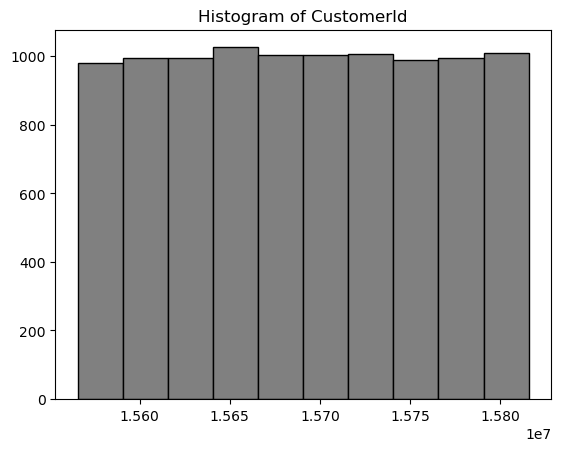

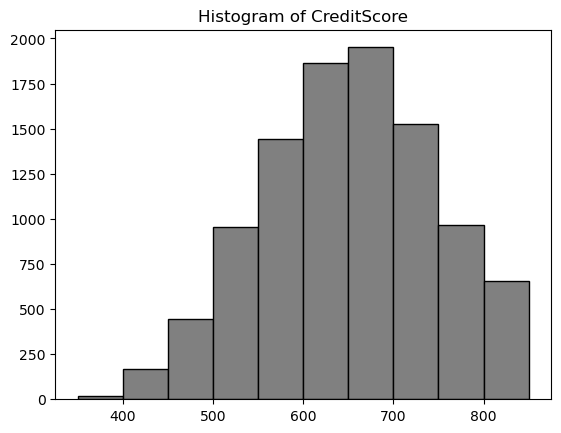

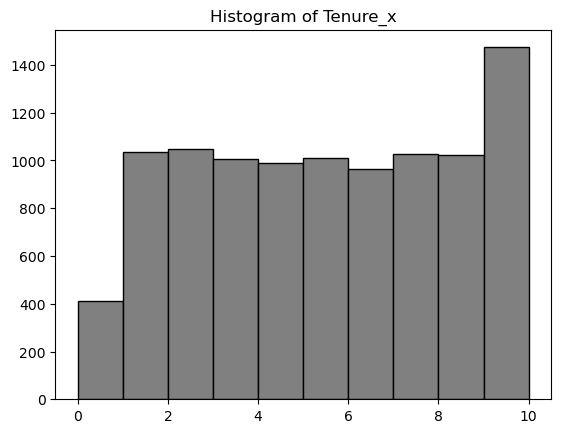

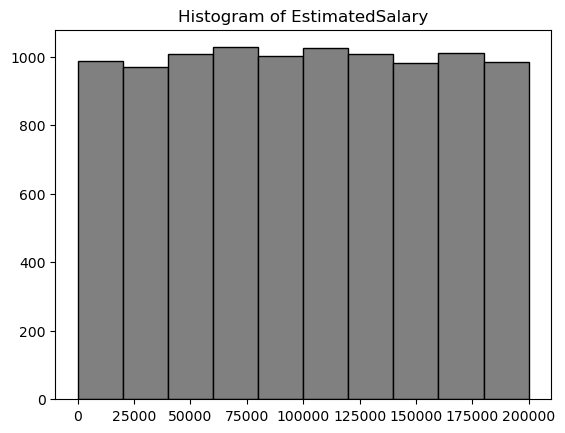

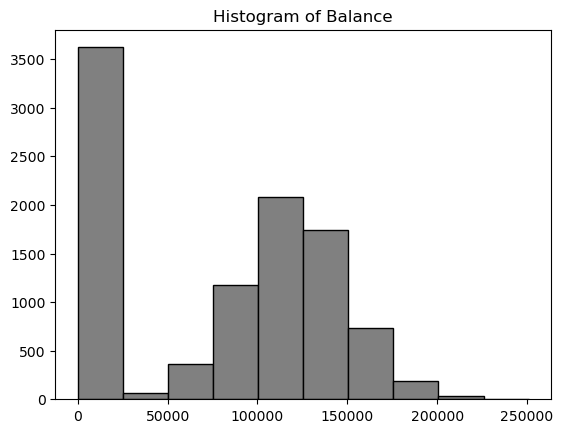

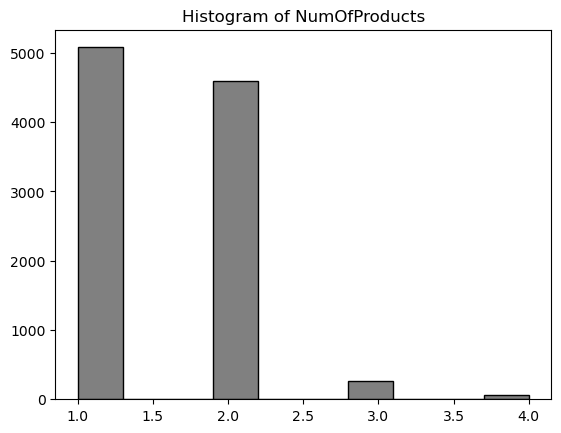

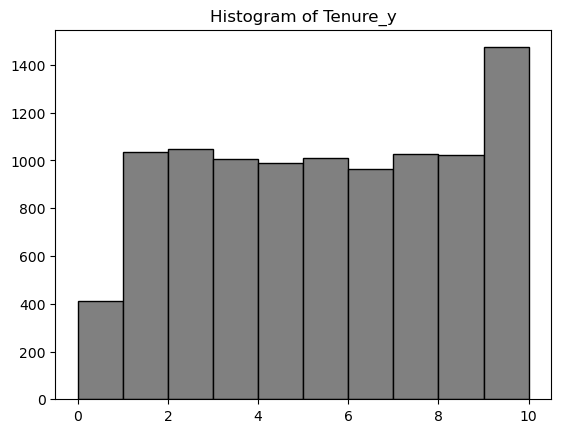

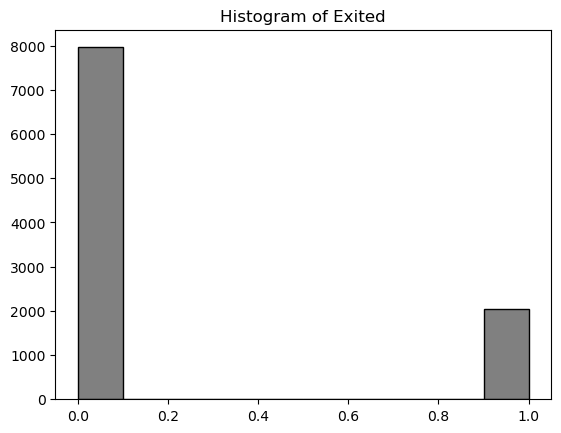

In [41]:
for column in num_columns:
    plt.hist(comb_df[column], color='grey', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.show()

In [42]:
## Data Analysis/Exploration 

# helper functions 

# generate barplot
plt.figure(figsize=(20,10))

def generate_bar_plot(x,y,xlabel, ylabel):
    plt.bar(x, y, color='grey', edgecolor='black')
    plt.title(f'Plot of {ylabel} vs {xlabel}')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
    
def generate_line_chart(x, y, xlabel,ylabel,data,color='grey',estimator=sum):
    sb.lineplot(x=x,y=y,markers=True, dashes=False, data=data,estimator=estimator, color=color)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(f'Plot of {ylabel} with changes in {xlabel}')
    plt.show()

<Figure size 2000x1000 with 0 Axes>

1. Demographic Analysis

Text(0.5, 1.0, 'Analyze the distribution of Customers')

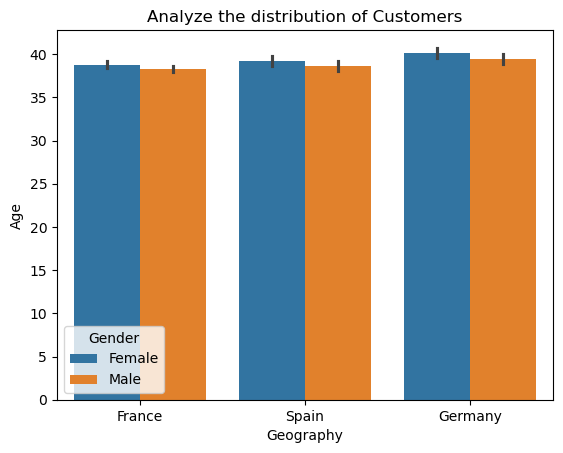

In [44]:
sb.barplot(y='Age', x='Geography', hue='Gender', data=comb_df)
plt.title('Analyze the distribution of Customers')

Result: Germany has more women than men closer to the  age 40, followed by Spain, then France

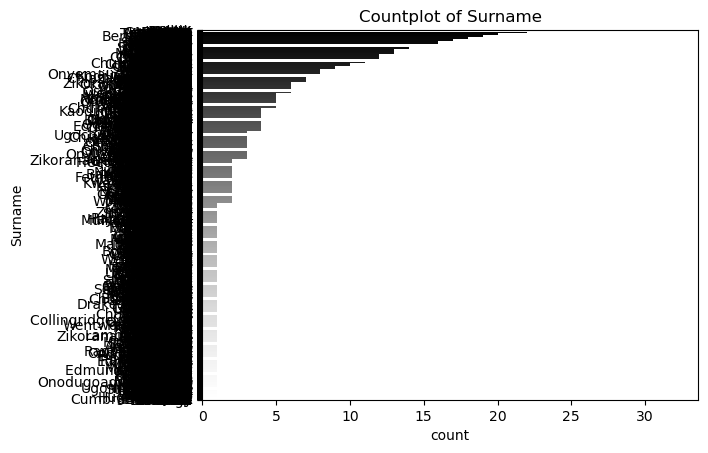

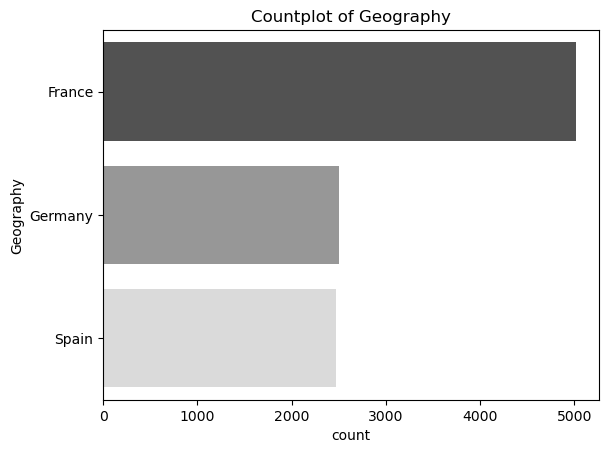

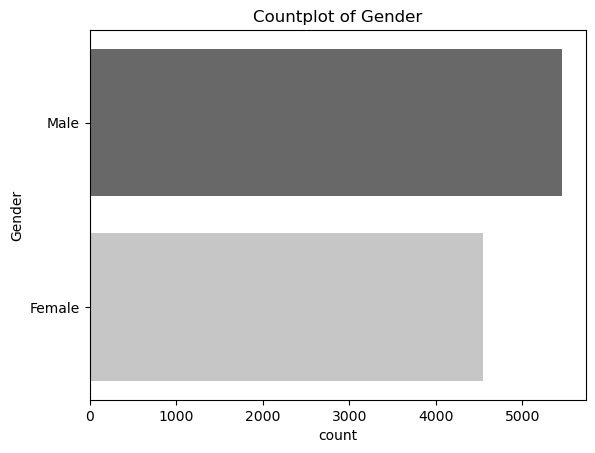

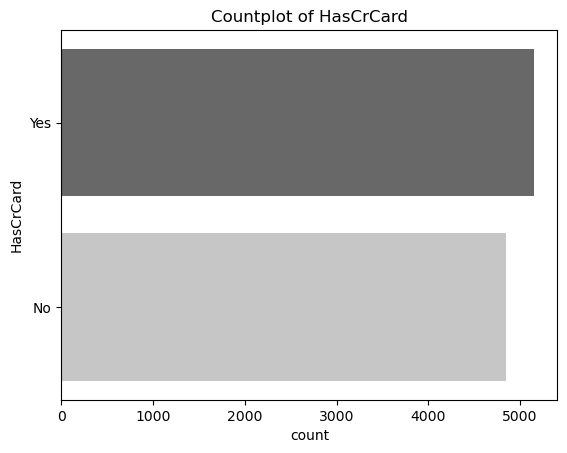

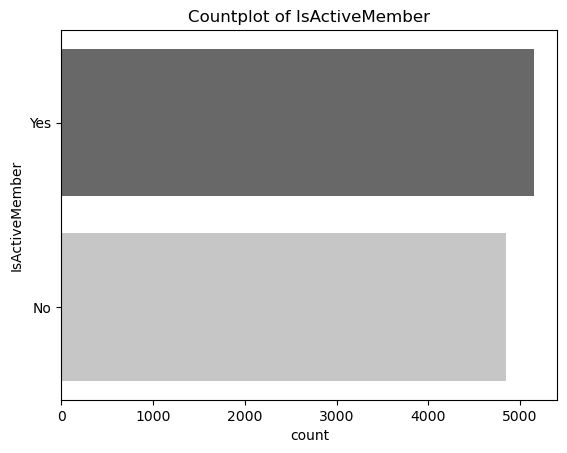

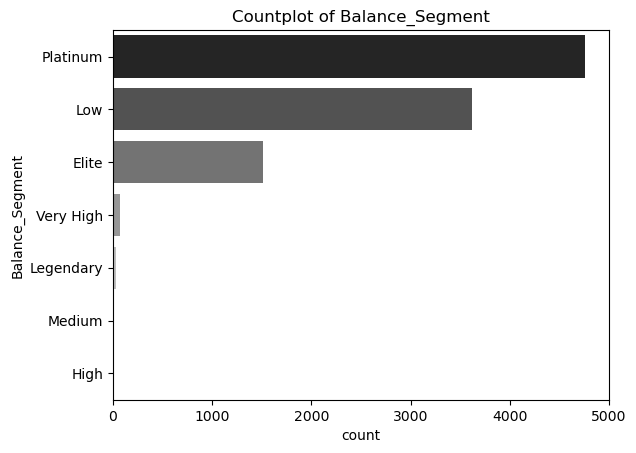

In [46]:

for column in cat_columns:
    sorted_categories = comb_df[column].value_counts().index
    sb.countplot(y=column, data=comb_df, order=sorted_categories, palette='Greys_r') 
    plt.title(f'Countplot of {column}')
    plt.show()

In [47]:
comb_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9997 entries, 0 to 10000
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CustomerId       9997 non-null   int64   
 1   Surname          9997 non-null   object  
 2   CreditScore      9997 non-null   int64   
 3   Geography        9997 non-null   object  
 4   Gender           9997 non-null   object  
 5   Age              9997 non-null   int32   
 6   Tenure_x         9997 non-null   int64   
 7   EstimatedSalary  9997 non-null   float64 
 8   Balance          9997 non-null   float64 
 9   NumOfProducts    9997 non-null   int64   
 10  HasCrCard        9997 non-null   object  
 11  Tenure_y         9997 non-null   int64   
 12  IsActiveMember   9997 non-null   object  
 13  Exited           9997 non-null   int64   
 14  Balance_Segment  9997 non-null   category
dtypes: category(1), float64(2), int32(1), int64(6), object(5)
memory usage: 1.4+ MB


In [48]:
comb_df.drop('Tenure_x', axis ='columns', inplace=True)

In [49]:
comb_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9997 entries, 0 to 10000
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CustomerId       9997 non-null   int64   
 1   Surname          9997 non-null   object  
 2   CreditScore      9997 non-null   int64   
 3   Geography        9997 non-null   object  
 4   Gender           9997 non-null   object  
 5   Age              9997 non-null   int32   
 6   EstimatedSalary  9997 non-null   float64 
 7   Balance          9997 non-null   float64 
 8   NumOfProducts    9997 non-null   int64   
 9   HasCrCard        9997 non-null   object  
 10  Tenure_y         9997 non-null   int64   
 11  IsActiveMember   9997 non-null   object  
 12  Exited           9997 non-null   int64   
 13  Balance_Segment  9997 non-null   category
dtypes: category(1), float64(2), int32(1), int64(5), object(5)
memory usage: 1.3+ MB


In [50]:
## 1b Any demographic segments

Text(0.5, 1.0, 'Demographic Segments')

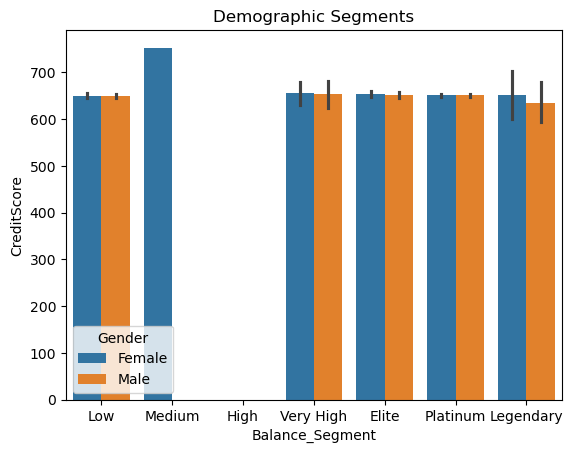

In [51]:
sb.barplot(y='CreditScore', x = 'Balance_Segment', hue='Gender', data=comb_df)
plt.title('Demographic Segments')

In [52]:
## Result - Blue label is for the females and the orange label for the males. The females are alone in the medium category. There no male or females in the high category all other categories the female and male are doing well with the exception of lengendary were the females are leading  followed by the males

In [53]:
# 2. Customer Engagement Patterns:

In [54]:
comb_df.rename(columns={'Tenure_y': 'Customer tenure',}, inplace=True)

In [55]:
comb_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9997 entries, 0 to 10000
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CustomerId       9997 non-null   int64   
 1   Surname          9997 non-null   object  
 2   CreditScore      9997 non-null   int64   
 3   Geography        9997 non-null   object  
 4   Gender           9997 non-null   object  
 5   Age              9997 non-null   int32   
 6   EstimatedSalary  9997 non-null   float64 
 7   Balance          9997 non-null   float64 
 8   NumOfProducts    9997 non-null   int64   
 9   HasCrCard        9997 non-null   object  
 10  Customer tenure  9997 non-null   int64   
 11  IsActiveMember   9997 non-null   object  
 12  Exited           9997 non-null   int64   
 13  Balance_Segment  9997 non-null   category
dtypes: category(1), float64(2), int32(1), int64(5), object(5)
memory usage: 1.3+ MB


Text(0.5, 1.0, 'Customer tenure and engagement')

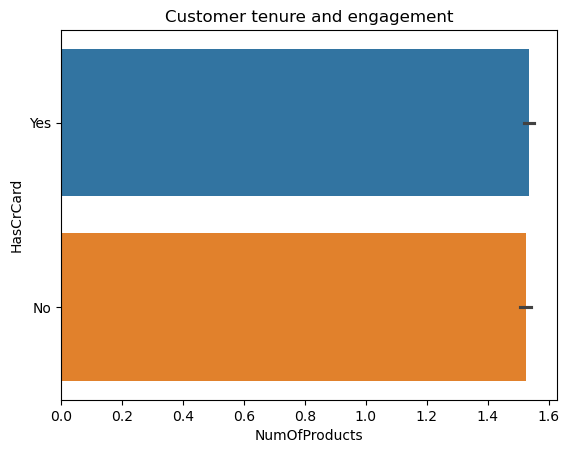

In [56]:
sb.barplot(x='NumOfProducts', y='HasCrCard', hue='IsActiveMember', data=comb_df)
plt.title('Customer tenure and engagement')

In [57]:

df_rating_count = comb_df.groupby('NumOfProducts')[['Balance_Segment']].count().sort_values(by='NumOfProducts')

In [58]:
df_rating_count

,Balance_Segment
NumOfProducts,
1,5081
2,4590
3,266
4,60


Text(0.5, 1.0, 'Tenure on Customer behavior')

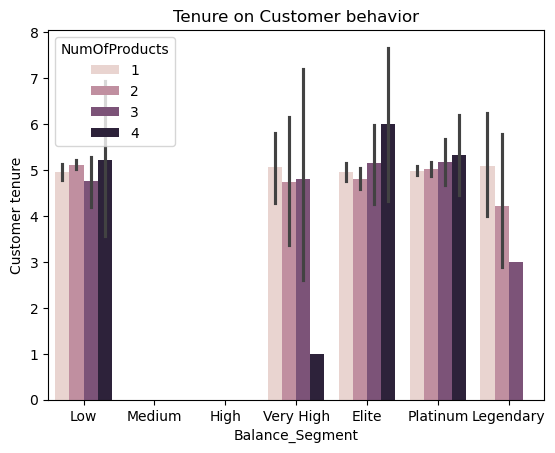

In [59]:
sb.barplot(y='Customer tenure', x='Balance_Segment', hue='NumOfProducts', data=comb_df)
plt.title('Tenure on Customer behavior')

In [60]:
## Result: There are four products, longer tenure customers do not hold more products

In [61]:
## 3. Financial Performance
# a. Credit Score distribution:

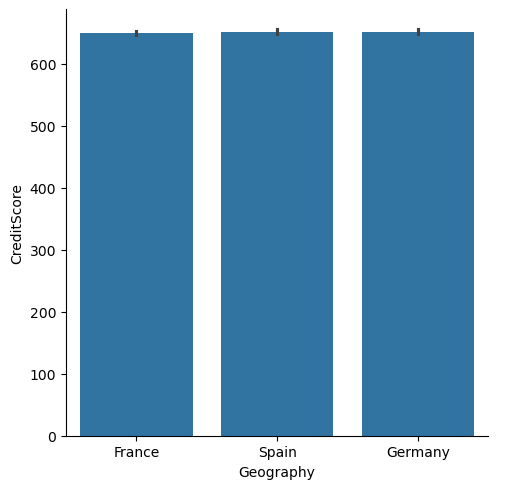

In [62]:


comb_df['Age'] = comb_df['Geography'].map({'France':1, 'Spain':2, 'Germany':3})
comb_df['Gender'] = comb_df['Geography'].map({'France':0, 'Spain':1, 'Germany':0})
sb.catplot(x='Geography', y='CreditScore', kind='bar', data=comb_df)

In [63]:
## Result: Credit score are same for France, Spain and Germany

In [64]:
## 3b. Analyze customer balance and estimated salary patterns

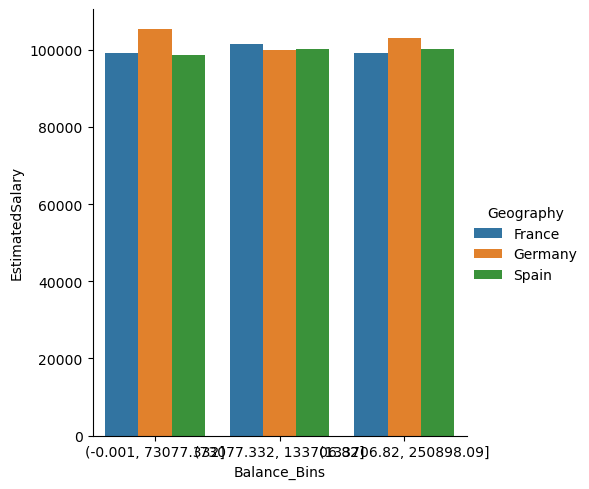

In [65]:
comb_df['Balance_Bins']= pd.qcut(comb_df['Balance'], q=[0, .4, .8, 1])
avg_salary =comb_df.groupby(['Balance_Bins', 'Geography'])['EstimatedSalary'].mean().reset_index()
sb.catplot(x='Balance_Bins', y='EstimatedSalary', hue ='Geography', kind='bar', data=avg_salary)

In [66]:
## Result: First and third bins Germany is higher in salary patterns, second bin France is higher followed by Germany

In [67]:
## Exited Customers Analysis:

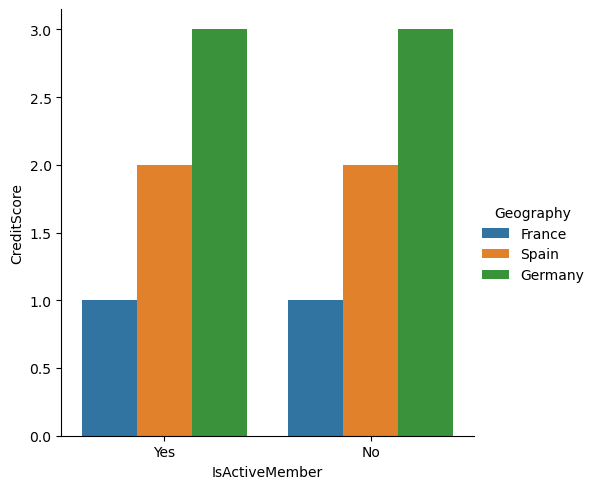

In [68]:
comb_df['CreditScore'] = comb_df['Geography'].map({'France':1, 'Spain':2, 'Germany':3})
comb_df['Balance'] = comb_df['Geography'].map({'France':0, 'Spain':1, 'Germany':0})
sb.catplot(x='IsActiveMember', y='CreditScore', hue ='Geography', kind='bar', data=comb_df)

In [69]:
## Result: German Customers did better followed by Spain and then France

In [70]:
## 4b. 

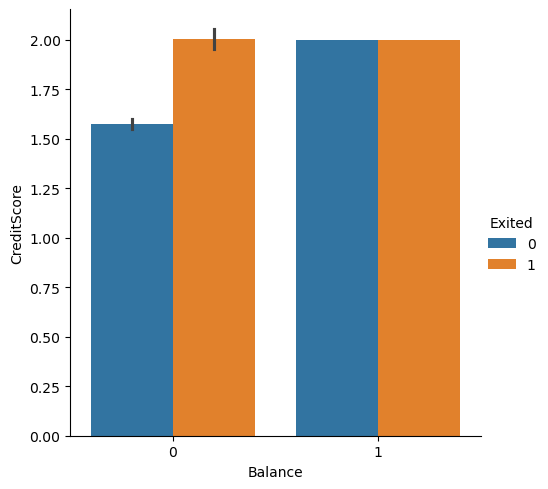

In [71]:
sb.catplot(x='Balance', y='CreditScore',  hue= 'Exited', kind='bar', data=comb_df)

In [72]:
## Result: Customers who left the bank have lesser credit score in the first bar chat while both customers who left and those that didnt leave are equal in the second bar chat

In [73]:
## 5. Customer Segmentation